In [ ]:
# !pip install suite2p
# !pip install scanimage-tiff-reader
# !pip install -U scikit-image
# !pip install tiffile
# !pip install --upgrade scipy

## Calcium Imaging analysis

### Load required libraries

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# from skimage.viewer import ImageViewer
# import skimage
import importlib

# from tiffStacks import sciscanTiff
import tiffStacks as tst

/Users/angueyraaristjm/anaconda3/lib/python3.7/site-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


In [2]:
cd '/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ChAT_gCaMP6s_example2/'

/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/ChAT_gCaMP6s_example2


### Load tiff file and run registration

In [3]:
fpath = 'ChAT_gCaMP6s_example2';
fname = '20190520_L03_04Bars_Original';
ts = tst.sciscanTiff(fpath,fname);
# ts.histRescaled() # display z-average
# ts.runRegistration() #use suite2P to register stack

In [4]:
from ScanImageTiffReader import ScanImageTiffReader as sitr
from skimage.viewer import ImageViewer
from tifffile import TiffFile, imwrite, xml2dict
import skimage
from scipy import signal

In [5]:
class rgTiff:
    """Python loader for registered tiff stack"""
    def __init__(self, filepath, filename):
        ### directories and paths ###
        self.filepath = filepath + '/'
        self.filename = 'rg_' + filename # path for registered tiff
        self.basedir = '/Users/angueyraaristjm/Documents/LiImaging/TwoPhoton/' + self.filepath + "analysis/"
        self.loadpath = self.basedir + self.filename + ".tif"
        ### Load tif file
        self.tif = sitr(self.loadpath)
        ### Run default methods
        self.metadata = self.getMetadata()
    
    # CONVENIENCE
    def getMetadata(self):
        imgDescription = self.getImageDescription()
        metadata = {
            'Lt' : imgDescription['OME']['Image']['Pixels']['SizeT'],
            'Lx' : imgDescription['OME']['Image']['Pixels']['SizeX'],
            'Ly' : imgDescription['OME']['Image']['Pixels']['SizeY'],
            'nChannels' :  imgDescription['OME']['Image']['Pixels']['SizeC'],
            'realX' : np.multiply(imgDescription['OME']['StructuredAnnotations']['XMLAnnotation'][3]['Value']['ImagePhysicalDimensions']['PhysicalSizeX'],1e6), # in um
            'realY' : np.multiply(imgDescription['OME']['StructuredAnnotations']['XMLAnnotation'][3]['Value']['ImagePhysicalDimensions']['PhysicalSizeY'],1e6), # in um
            'realT' : imgDescription['OME']['StructuredAnnotations']['XMLAnnotation'][3]['Value']['ImagePhysicalDimensions']['PhysicalSizeT'], # in s
            'samplingRate' : 0,
            'cellBodyDiameterX': 0,
            'cellBodyDiameterY': 0,
        }
        metadata['samplingRate'] = np.divide(metadata['Lt'],metadata['realT'])
        metadata['cellBodyDiameterX'] = np.divide(metadata['Lx'],metadata['realX']) * 5
        metadata['cellBodyDiameterY'] = np.divide(metadata['Ly'],metadata['realY']) * 5
        return metadata
    
    def getImageDescription(self):
        imgDescription = xml2dict(self.tif.description(0))
        return imgDescription
    
    def getData(self):
        img = self.tif.data();
        return img
    
    def getTAxis(self):
        tAx = range(self.metadata['Lt']) / self.metadata['samplingRate']
        return tAx



In [6]:
ts = rgTiff(fpath,fname)

In [ ]:
importlib.reload(tst)
# b

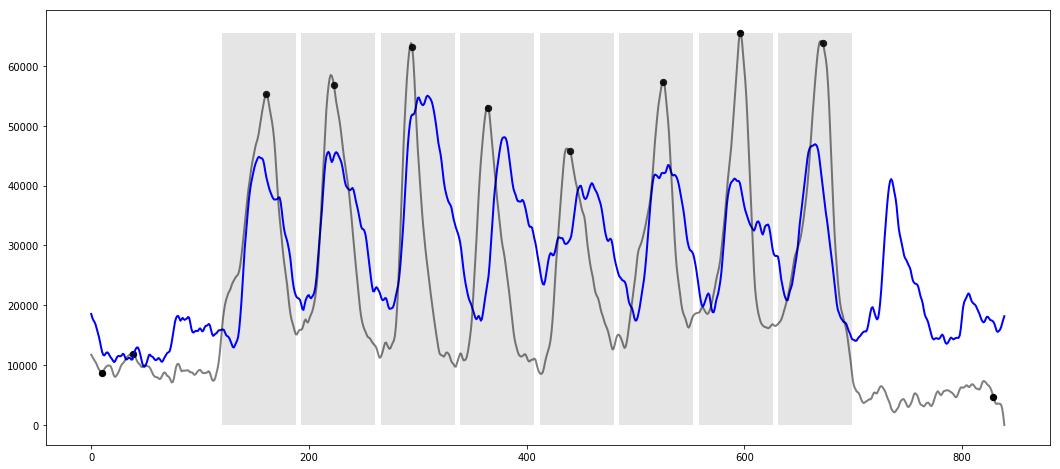

In [65]:
a = ts.getData()[:,57,123]
b = tst.getTSeries(ts.getData()[:,104:128,226:256])
bf_poles, bf_freq = signal.butter(1, .1, btype='low', analog=False, output='ba', fs=None)
aF = signal.filtfilt(bf_poles, bf_freq,a)
bF = signal.filtfilt(bf_poles, bf_freq,b)

tAx = ts.getTAxis();
tAx = np.arange(np.size(a));
fig, ax = plt.subplots(1,1,figsize=(18,8))
# plt.plot(tAx, a, lw=2)
plt.plot(tAx, aF, lw=2, c='b')
plt.plot(tAx, tst.norm16bit(bF), lw=2, c=[0,0,0,.5])

peakInd = signal.find_peaks_cwt(bF, np.ones(8)*10)
plt.scatter(tAx[peakInd], tst.norm16bit(bF)[peakInd], s=40, c='k')
# plt.scatter(tAx[peakInd], tst.norm16bit(bF)[peakInd], s=40, c=np.array([0,0,0,0.5]))

nDirections = 8;
barW = 68;
bar0 = 120;
barIBI = 5;
barLims = np.multiply(range(nDirections+1),barW)+bar0
barLims = barLims + np.multiply(range(nDirections+1),barIBI)

for b in range(nDirections):
    rect = matplotlib.patches.Rectangle((barLims[b],0),barW,np.power(2,16),linewidth=1,edgecolor='none',facecolor='grey', alpha =.2)
    ax.add_patch(rect)




In [37]:
aF[peakInd]

array([10519.90644709, 44243.60811621, 45068.87531875, 55025.59868596,
       37381.33900286, 37935.32206105, 43368.59852407, 32996.99488557,
       46185.55752777, 29055.02747341, 17617.06743913])

In [ ]:
img = tst.getMean(ts.getData())
fig, ax = skimage.filters.try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
d = ts.getData()
# ts.data()
np.shape(d)[1:]

# DeBug explorations

In [ ]:
maskMul,maskOffset,cfRefImg = register.prepare_masks(refImg,ops)
refAndMasks = [maskMul,maskOffset,cfRefImg]
aligned_data, yshift, xshift, corrXY, yxnr = register.phasecorr(ts.rescale(), refAndMasks, ops)

In [ ]:
ts.plotHistogram(test_ops['refImg']);

